In [23]:
single_image = "/home/oween/Escritorio/AI-THD-Fourth_semester/Machine Learning/Project/grayscale_images/Non-Sperm/Non-Sperm (42).bmp"
data_image = "/home/oween/Escritorio/AI-THD-Fourth_semester/Machine Learning/Project/resized_images/Non-Sperm/Non-Sperm (962).bmp"
 

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 


In [ ]:
# 1. Load image metadata
base_dir = '/home/oween/Escritorio/AI-THD-Fourth_semester/Machine Learning/Project/RawData'  # change this to your RAWDATA FOlder
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
records = []

for cls in classes:
    cls_dir = os.path.join(base_dir, cls)
    for fname in os.listdir(cls_dir):
        fpath = os.path.join(cls_dir, fname)
        try:
            with Image.open(fpath) as img:
                width, height = img.size
                fmt = img.format
                mode = img.mode
                 

            records.append({
                'path': fpath,
                'class': cls,
                'width': width,
                'height': height,
                'format': fmt,
                'mode': mode,
                
            })
        except Exception as e:
            records.append({
                'path': fpath,
                'class': cls,
                'width': None,
                'height': None,
                'format': None,
                'mode': None,
                'error': str(e)
            })

df = pd.DataFrame(records)

In [4]:
df.to_csv('image_metadata.csv', index=False)   

In [6]:

# Create a DataFrame that stores the counts of each class, we could use this to visualize the distribution of classes (pie chart below)
counts = df['class'].value_counts().rename_axis('class').reset_index(name='counts')
 

In [7]:
counts

,class,counts
0,Normal_Sperm,1021
1,Abnormal_Sperm,1005
2,Non-Sperm,974


In [8]:
# Check for the metadata in our raw data
df['format'].value_counts()

format
BMP    2520
PNG     480
Name: count, dtype: int64

In [9]:
# Display of the format counts, here we ask ourselves, why knowing the format of the images is important?
# My opinion is that it helps us to understand the type of images we are dealing with
# we could be aware that different formats may affect the speed of processing when training 

import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(
    x=format_counts.index,
    y=format_counts.values,
    palette=['#66b3ff', '#99ff99']  
)
plt.title('Count of Image Formats', fontsize=14)
plt.xlabel('Format')
plt.ylabel('Count')
plt.show()

NameError: name 'format_counts' is not defined

<Figure size 600x400 with 0 Axes>

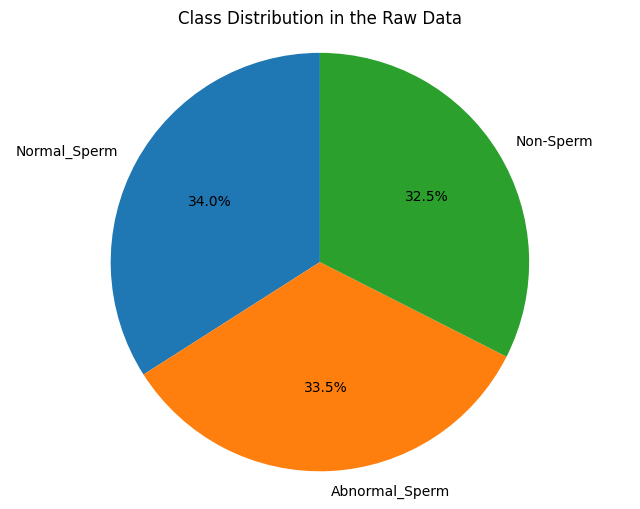

In [10]:
 

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts['counts'], labels=counts['class'] , autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution in the Raw Data')
plt.axis('equal') # otherwise pie chart could look smaller and like an oval  
plt.show()

# Questions : What does this pie chart tell us about the distribution of classes? is it balanced or imbalanced? Could affect our model's performance later? does it help? 
# In case we do a resizing of the images we could compare the distribution of classes before and after resizing together with the counts of each class too.
# Dont forget that main idea to emphasize here is that this is actually a balance dataset, we it is good!


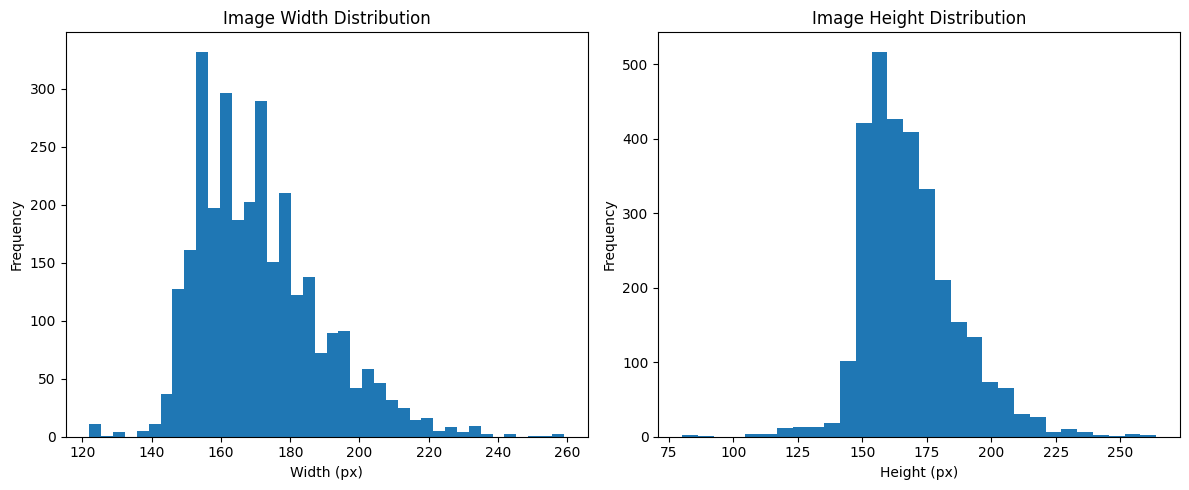

In [11]:
# Hey dont forget that we are working with the 'df' DataFrame, which contains the metadata, you can use the image_metadata.csv file as well 

 
# Create 1 row with 2 columns 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Left plot: Width distribution
axes[0].hist(df['width'].dropna(), bins=40) 
# Understand the bins parameter: It start with the minimum value and goes to the maximum value in this case
# around 120 for widt and 70 for height, then it splits these range into 40 equal parts (bins)
# I select 40 bins to have a more detailed view of the distribution, if increasing it might look too noisy 

axes[0].set_title('Image Width Distribution')
axes[0].set_xlabel('Width (px)')
axes[0].set_ylabel('Frequency')

# Right plot: Height distribution
axes[1].hist(df['height'].dropna(), bins=30)
axes[1].set_title('Image Height Distribution')
axes[1].set_xlabel('Height (px)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()   # Adjust spacing so titles/labels don’t overlap
plt.show()


In [12]:
# To check for unreadable images run this code
unreadable_images = df[df['width'].isna()]
print(unreadable_images[['path', 'class', 'width', 'height', 'format', 'mode']])


Empty DataFrame
Columns: [path, class, width, height, format, mode]
Index: []


In [13]:
# What does this histogram tell us about the distribution of image sizes? This is actually very important to understand!!! 
# We can present this distrubtion as a reason why we are resizing the images later


# From my opinion, there is not a clear standard size in our dataset, most of them are in:
# - Width: between 150 and 180 pixels
# - Height: between 140 and 175 pixels
# Again, there is  large inconsistency in the image sizes, could affect our model? Yes
# Before the model, it might affect our preprocessing steps cuz some steps might depend on the image size which could generate distortions on the values




<Figure size 640x480 with 0 Axes>

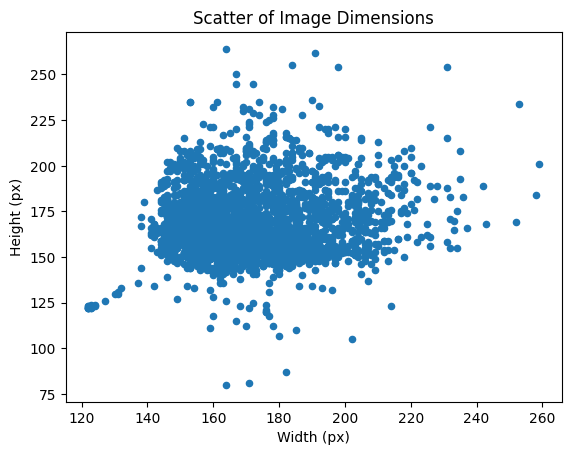

In [14]:
# 4. Scatter plot of width vs. height
# This scatter just re-affirm what i meant before, we can see that most of the images are among a range of size but outside of this range we can find other images as well
# Would we consider those as outliers? Yes! I think so, since those values have completely different sizes, some of them small some of them larger
# What do we do with them?  Resizing!
# Other alternative would be deleting them but not what i'd do.


plt.figure()
df.dropna(subset=['width', 'height']).plot.scatter(x='width', y='height')
plt.title('Scatter of Image Dimensions')
plt.xlabel('Width (px)')
plt.ylabel('Height (px)')
plt.show()

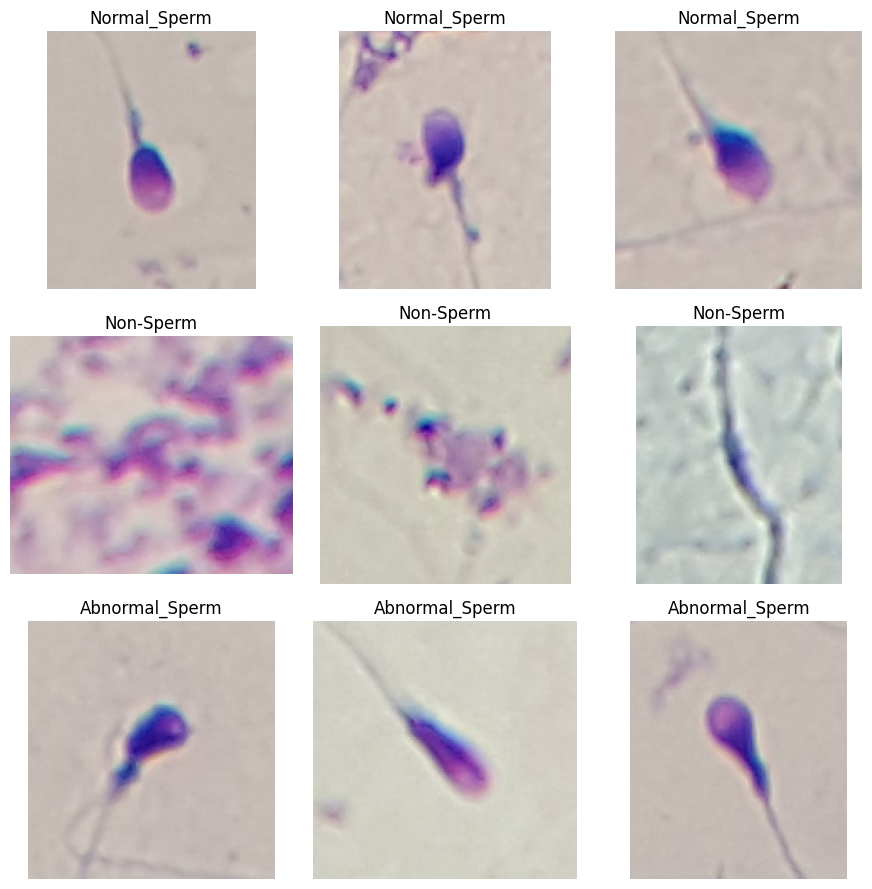

In [15]:
fig, axes = plt.subplots(len(classes), 3, figsize=(9, 3 * len(classes)))
for i, cls in enumerate(classes):
    samples = df[df['class'] == cls].sample(min(3, len(df[df['class'] == cls])))
    for j, (_, row) in enumerate(samples.iterrows()):
        img = Image.open(row['path'])
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(cls)
plt.tight_layout()
plt.show()

In [ ]:
# Other alternative step would be displaying the RGB Channels but I didnt know how to evaluate it. 